In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import skew, kurtosis

In [4]:
# importing data
data = pd.read_csv("eurusd.csv")
data.head() # preview

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,2016-02-11,1.12782,1.13753,1.12742,1.13142
1,2016-02-12,1.13135,1.13324,1.12142,1.12549
2,2016-02-15,1.12389,1.12419,1.11281,1.11635
3,2016-02-16,1.11637,1.11929,1.11246,1.11373
4,2016-02-17,1.11372,1.11790,1.11062,1.11290


<function matplotlib.pyplot.show(close=None, block=None)>

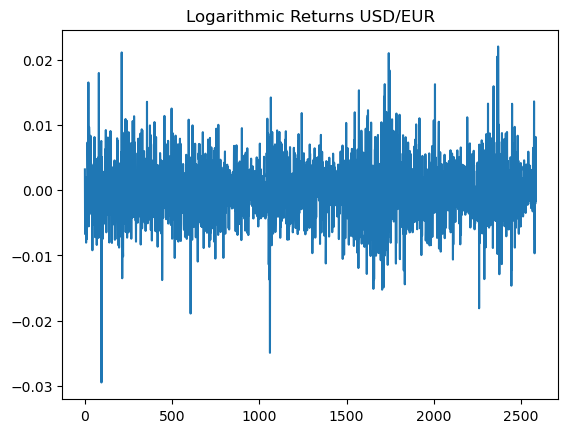

In [5]:
returns = data["Zamkniecie"] / data["Otwarcie"] # Zamkniecie = Close, Otwarcie = Open
log_returns = np.log(returns)

plt.plot(log_returns)
plt.title("Logarithmic Returns USD/EUR")
plt.show

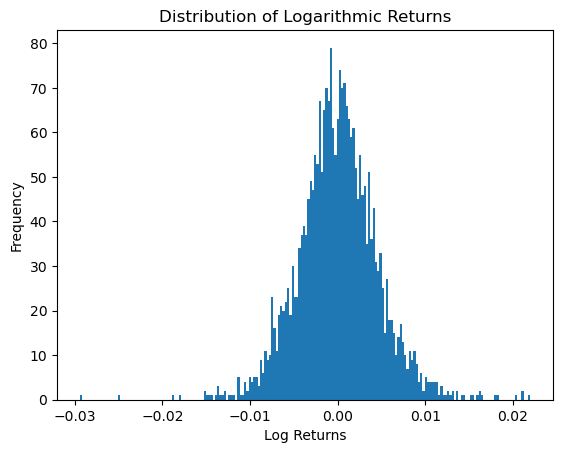

In [6]:
plt.figure()
plt.hist(log_returns, bins=200)
plt.xlabel("Log Returns")
plt.ylabel("Frequency")
plt.title("Distribution of Logarithmic Returns")
plt.show()

In [7]:
# using pre-built Python functions 

mean = np.mean(log_returns)
variance = np.var(log_returns)
skewness = skew(log_returns)
excess_kurtosis = kurtosis(log_returns) # this is excess kurtosis!!! (K-3)

print("Sample Statistics \n")
print("Mean:", mean)
print("Variance:", variance)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Sample Statistics 

Mean: 2.919778189085632e-05
Variance: 2.0681342440779526e-05
Skewness: 0.05157669792489804
Kurtosis: <function kurtosis at 0x1625da480>


In [8]:
# Excercise for practice: calculating manually :)

T = len(log_returns) 
my_mean = sum(log_returns) / T

sum2 = 0
sum3 = 0
sum4 = 0

for r in log_returns:
    difference = r - my_mean
    sum2 += difference ** 2         # this could probably also be calculated with the for loop? 
    sum3 += difference ** 3         
    sum4 += difference ** 4

my_variance = sum2 / T
my_sigma = my_variance ** 0.5

my_skewness = sum3 / (T * my_sigma**3)
my_kurtosis = sum4 / (T * my_sigma**4)

print("Mean:", my_mean)
print("Variance:", my_variance)
print("Skewness:", my_skewness)
print("Kurtosis:", my_kurtosis)  # not substracting 3

Mean: 2.919778189085633e-05
Variance: 2.0681342440779526e-05
Skewness: 0.051576697924898184
Kurtosis: 5.254331522002318


In [9]:
# Jarque Berra Test for normallity
T = len(log_returns)
JB = (skewness ** 2) * T / 6 + ((excess_kurtosis)** 2) * T / 24 
print("JB Test Statistics:", JB)

# chi-squared distibution with 2 DOF 
from scipy.stats import chi2
p_value = 1 - chi2.cdf(JB, df=2)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0: data is not normally distributed")
else:
    print("Fail to reject H0: data may be normally distributed")

JB Test Statistics: 548.7331704816733
p-value: 0.0
Reject H0: data is not normally distributed


The JB statistic is chi2-distributed with exactly 2 degrees of freedom because it is constructed from two independent moment conditions that must hold under normality. 

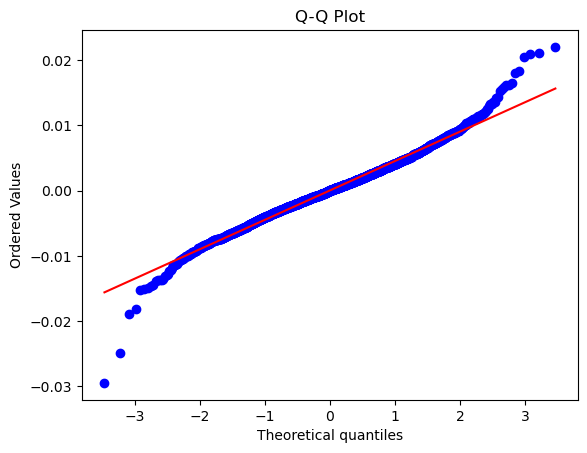

In [10]:
# QQ plots
import scipy.stats as stats

stats.probplot(log_returns, dist="norm", plot = plt)
plt.title("Q-Q Plot")
plt.show()

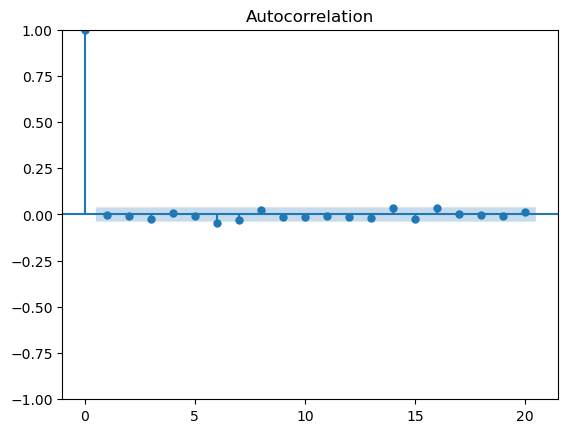

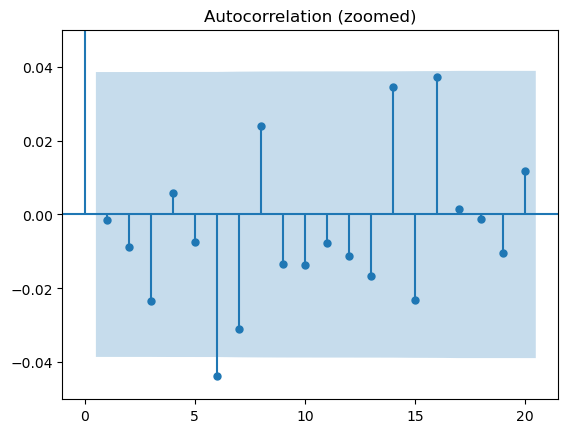

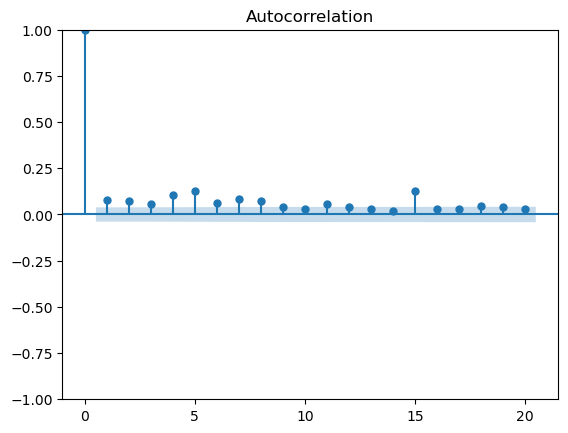

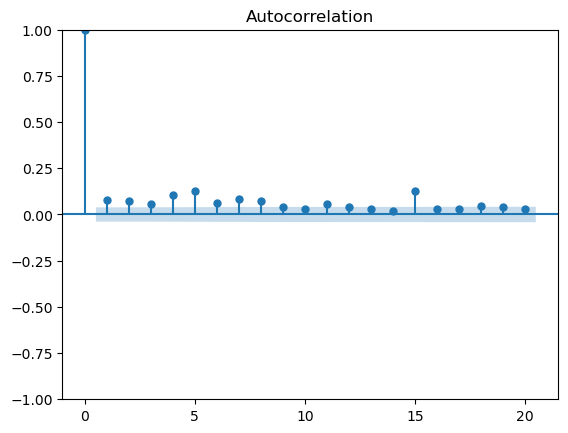

In [ ]:
# ACF 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(log_returns, lags=20, alpha=0.05)

# zoomed
plot_acf(log_returns, lags=20, alpha=0.05)
plt.ylim(-0.05, 0.05)   # zoom in
plt.title("Autocorrelation (zoomed)")
plt.show()

# squared returns 
plot_acf(log_returns**2, lags=20, alpha=0.05) # why is it printing two times? 

Returns are not significantly autocorrelated, squared returns are

In [ ]:
# Ljung-Box Test, Variance-ratio Test